In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [42]:
labels_train.shape
labels_train
labels_test.shape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [13]:
images_train.shape
# images_test.shape
# labels_train.shape

(50000, 32, 32, 3)

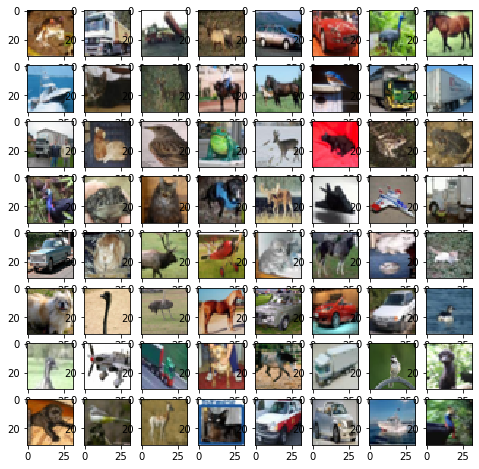

In [9]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

In [14]:
training_data = images_train.reshape(50000, 3072)
testing_data = images_test.reshape(10000, 3072)

pca = PCA()
pca.fit(training_data)
# images_train.shape

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca.components_.shape
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k += 1
k

91

In [66]:
pca = PCA(n_components = k, whiten = True)
x_transform = pca.fit_transform(training_data)
x_transform.shape

(50000, 91)

In [67]:
x_approx = pca.inverse_transform(x_transform)
x_approx = x_approx.reshape((50000, 32, 32, 3))
x_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

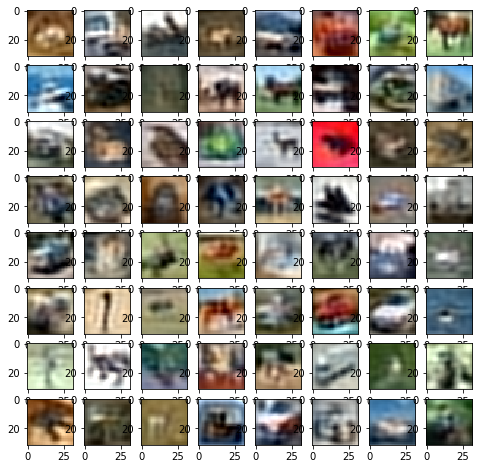

In [68]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

In [71]:
print(pca.components_.shape)
eigenFaces = pca.components_.reshape((k,32,32,3))

(91, 3072)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

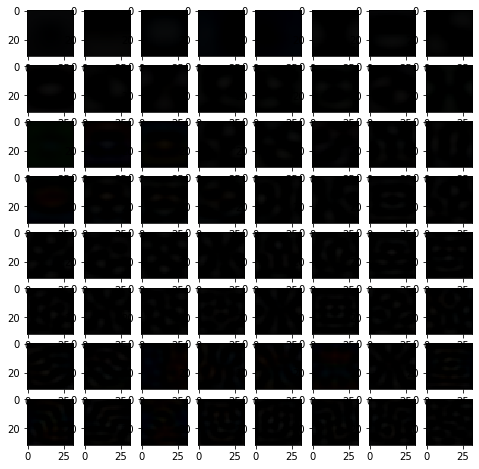

In [72]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenFaces[i], cmap = plt.cm.bone)
plt.show()

In [73]:
training_data_pca = x_transform
testing_data_pca = pca.transform(testing_data)
testing_data_pca.shape

(10000, 91)

In [85]:
import time
rf_clf = ensemble.RandomForestClassifier()
start = time.time()
rf_clf.fit(labels_train, cls_train)
print(time.time() - start)
y_pred = rf_clf.predict(labels_test)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

1.3773560523986816
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      1.00      1.00      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    

In [75]:
rf_clf = ensemble.RandomForestClassifier()
start = time.time()
rf_clf.fit(training_data_pca, cls_train)
print(time.time() - start)
y_pred = rf_clf.predict(testing_data_pca)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

69.7824490070343
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.52      0.58      0.55      1000
           2       0.40      0.34      0.37      1000
           3       0.34      0.30      0.32      1000
           4       0.42      0.39      0.40      1000
           5       0.39      0.37      0.38      1000
           6       0.49      0.57      0.52      1000
           7       0.52      0.44      0.48      1000
           8       0.54      0.61      0.57      1000
           9       0.46      0.50      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000

[[563  45  47  20  36  21  29  33 149  57]
 [ 27 582  20  20  16  27  24  38  80 166]
 [112  31 340  77 139  66 129  43  33  30]
 [ 57  48  71 304  51 195 121  62  33  58]
 [ 51  18 131  73 386  54 146  84  32  25]
 [ 33  28

In [80]:
svc_clf = svm.SVC()
start = time.time()
svc_clf.fit(training_data_pca, cls_train)
print(time.time() - start)
y_pred = svc_clf.predict(testing_data_pca)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

634.9283263683319
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1000
           1       0.67      0.71      0.69      1000
           2       0.46      0.42      0.44      1000
           3       0.39      0.41      0.40      1000
           4       0.51      0.49      0.50      1000
           5       0.48      0.45      0.47      1000
           6       0.59      0.66      0.62      1000
           7       0.65      0.58      0.61      1000
           8       0.68      0.68      0.68      1000
           9       0.59      0.64      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000

[[637  31  51  21  24  12  19  14 135  56]
 [ 28 708   8  28  10  10  15  17  37 139]
 [ 76  23 423  93 125  75  94  44  17  30]
 [ 19  34  81 409  62 171 107  45  17  55]
 [ 36  11 128  69 488  59 104  71  20  14]
 [ 15  1

In [83]:
dt_clf = DecisionTreeClassifier()
start = time.time()
dt_clf.fit(training_data_pca, cls_train)
print(time.time() - start)
y_pred = dt_clf.predict(testing_data_pca)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

9.74635934829712
              precision    recall  f1-score   support

           0       0.32      0.35      0.34      1000
           1       0.34      0.31      0.33      1000
           2       0.21      0.22      0.22      1000
           3       0.18      0.18      0.18      1000
           4       0.23      0.24      0.23      1000
           5       0.24      0.22      0.23      1000
           6       0.27      0.28      0.28      1000
           7       0.25      0.24      0.25      1000
           8       0.35      0.36      0.35      1000
           9       0.29      0.27      0.28      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000

[[349  63  93  59  65  53  37  61 163  57]
 [ 77 313  56  65  52  55  60  73 101 148]
 [ 92  35 220  97 142  97 127  95  60  35]
 [ 74  62 100 182  96 133 119 103  57  74]
 [ 68  32 139  98 237  88 157  98  47  36]
 [ 51  47

In [84]:
from sklearn import naive_bayes
nb_clf = naive_bayes.GaussianNB()
start = time.time()
nb_clf.fit(training_data_pca, cls_train)
print(time.time() - start)
y_pred = nb_clf.predict(testing_data_pca)
print(classification_report(cls_test, y_pred))
print(confusion_matrix(cls_test, y_pred))

0.10683345794677734
              precision    recall  f1-score   support

           0       0.41      0.22      0.29      1000
           1       0.42      0.46      0.44      1000
           2       0.19      0.10      0.13      1000
           3       0.27      0.20      0.23      1000
           4       0.24      0.61      0.35      1000
           5       0.36      0.26      0.30      1000
           6       0.42      0.35      0.39      1000
           7       0.45      0.35      0.40      1000
           8       0.43      0.43      0.43      1000
           9       0.35      0.46      0.40      1000

    accuracy                           0.34     10000
   macro avg       0.36      0.34      0.34     10000
weighted avg       0.36      0.34      0.34     10000

[[223  84  48  42 258  24  25  44 161  91]
 [ 34 458  30  47  43  22  32  33 122 179]
 [ 42  37  99  84 434  62  82  55  36  69]
 [ 33  57  77 198 194 145  93  59  27 117]
 [ 26  19  67  38 610  41  76  69  26  28]
 [ 21 

In [86]:
import numpy as np
final_ans = np.array([class_names[i] for i in y_pred])
final_ans.shape
np.savetxt('cifar10_sol.csv', final_ans, delimiter = ',', fmt = '%s')